In [101]:
from YOLOv8_Explainer import yolov8_heatmap, display_images

In [102]:
model = yolov8_heatmap(
    weight="weights/best.pt",
    method="GradCAM",
    show_box=False
)

Model summary: 225 layers, 3012798 parameters, 0 gradients


In [103]:
SAMPLE_IMG="C:\\Users\\haksh\\Documents\\CALSS MATERIALS\\SEM7\\Capstone\\datasets\\VisDrone\\VisDrone2019-DET-train\\images\\0000263_00001_d_0000173.jpg"

In [104]:
imagelist = model(
    img_path=SAMPLE_IMG
    )

In [105]:
len(imagelist)

1

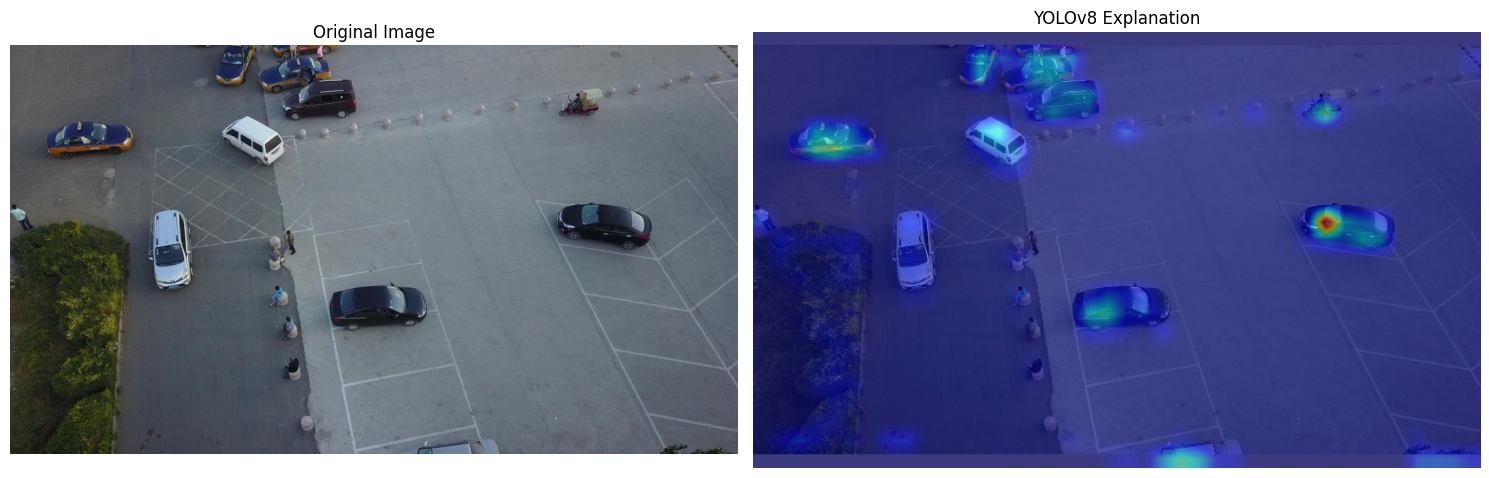

In [106]:
import matplotlib.pyplot as plt
from PIL import Image

# Load original image
original_img = Image.open(SAMPLE_IMG)

# Create subplot to show original and explanation side by side
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# Show original image
axes[0].imshow(original_img)
axes[0].set_title("Original Image")
axes[0].axis('off')

# Show explanation image
axes[1].imshow(imagelist[0])
axes[1].set_title("YOLOv8 Explanation")
axes[1].axis('off')

plt.tight_layout()
plt.show()

Model summary: 225 layers, 3012798 parameters, 0 gradients
Model summary: 225 layers, 3012798 parameters, 0 gradients
Model summary: 225 layers, 3012798 parameters, 0 gradients
Model summary: 225 layers, 3012798 parameters, 0 gradients
Model summary: 225 layers, 3012798 parameters, 0 gradients
Model summary: 225 layers, 3012798 parameters, 0 gradients
Model summary: 225 layers, 3012798 parameters, 0 gradients
Model summary: 225 layers, 3012798 parameters, 0 gradients
Model summary: 225 layers, 3012798 parameters, 0 gradients


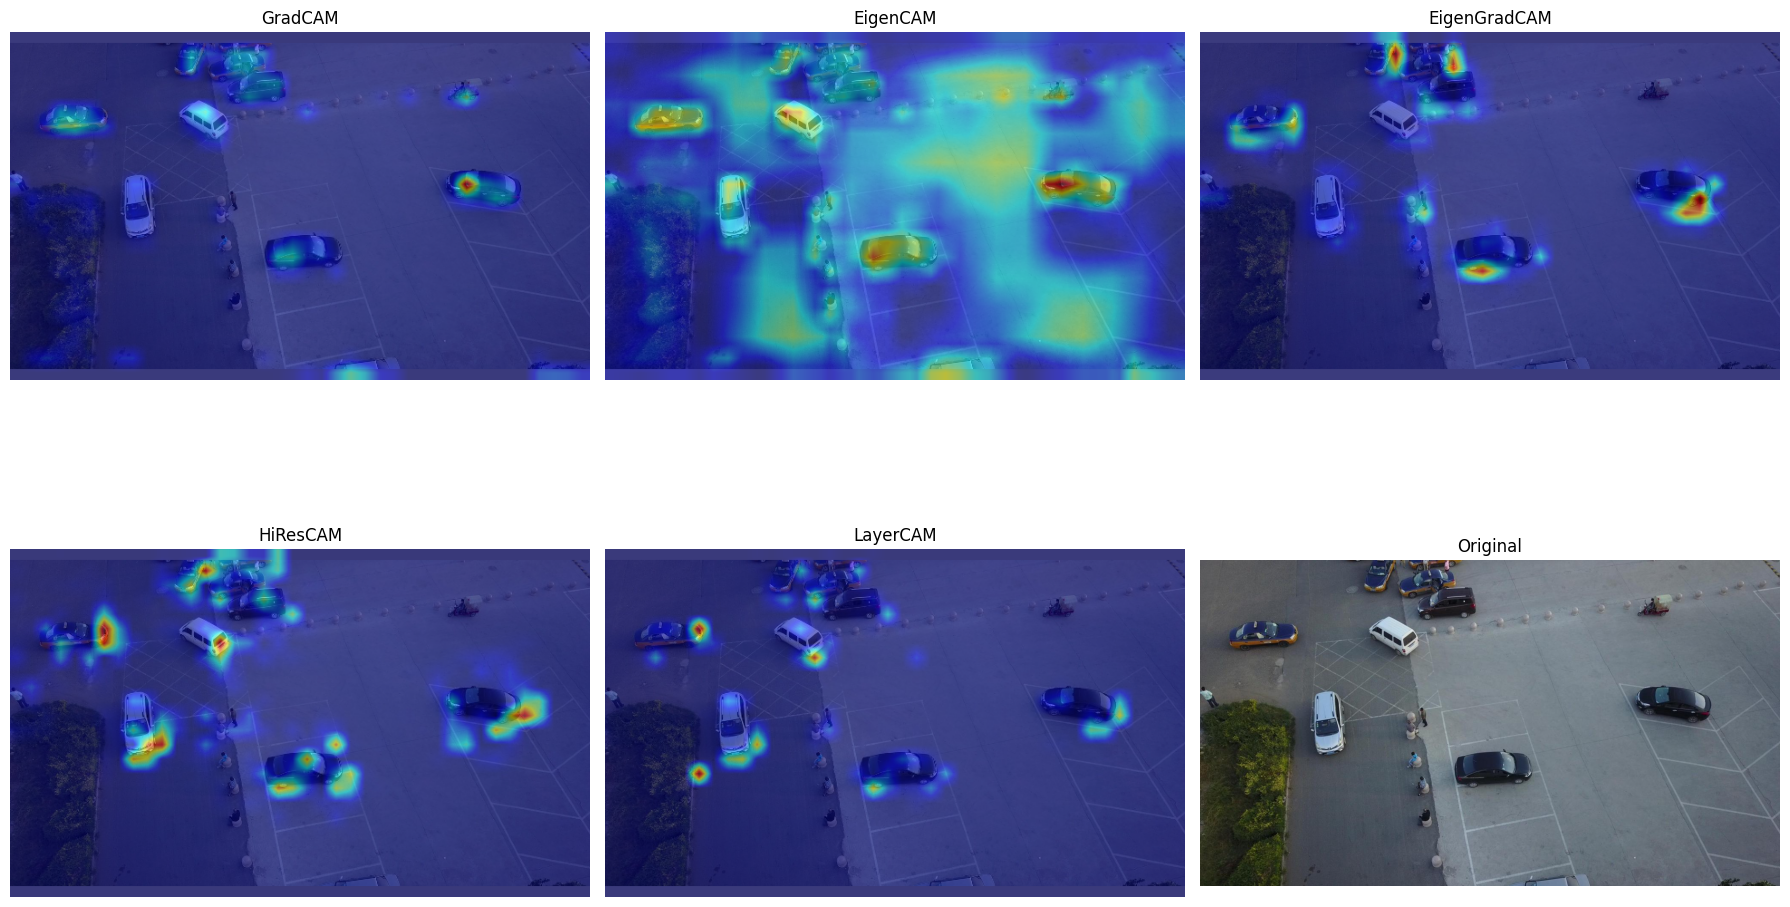

In [107]:
methods = ["GradCAM", "EigenCAM", "EigenGradCAM", "HiResCAM", "LayerCAM"]
results = {}

for method in methods:
    model = yolov8_heatmap(weight="weights/best.pt", method=method, show_box=False)
    results[method] = model(img_path=SAMPLE_IMG)[0]

# Create comparison grid
fig, axes = plt.subplots(2, 3, figsize=(18, 12))
for i, (method, img) in enumerate(results.items()):
    row, col = i // 3, i % 3
    axes[row, col].imshow(img)
    axes[row, col].set_title(f"{method}")
    axes[row, col].axis('off')
axes[1, 2].imshow(original_img)
axes[1, 2].set_title("Original")
axes[1, 2].axis('off')
plt.tight_layout()
plt.show()

In [108]:
PRUNED_FINETUNED = "weights/best.pt"
ORIGINAL = "../Object-Detection/Yolo-V8/weights/best.pt"
# ORIGINAL = "original/yolov8_trained.pt"

## Model Metrics Comparison

Compare the performance metrics of the original model vs pruned & fine-tuned model

In [109]:
from ultralytics import YOLO
import pandas as pd
import torch
import os

# Fix for PyTorch 2.6+ weights_only security update
# Temporarily override torch.load to use weights_only=False for YOLO models
original_torch_load = torch.load

def patched_torch_load(*args, **kwargs):
    if 'weights_only' not in kwargs:
        kwargs['weights_only'] = False
    return original_torch_load(*args, **kwargs)

torch.load = patched_torch_load

# Load both models
print("Loading models...")
print(f"Pruned model path: {PRUNED_FINETUNED}")
print(f"Original model path: {ORIGINAL}")
print(f"Pruned exists: {os.path.exists(PRUNED_FINETUNED)}")
print(f"Original exists: {os.path.exists(ORIGINAL)}")

try:
    model_pruned = YOLO(PRUNED_FINETUNED)
    print("✓ Pruned model loaded")
except Exception as e:
    print(f"Error loading pruned model: {e}")
    import traceback
    traceback.print_exc()
    
try:
    model_original = YOLO(ORIGINAL)
    print("✓ Original model loaded")
except Exception as e:
    print(f"Error loading original model: {e}")
    import traceback
    traceback.print_exc()

# Restore original torch.load
torch.load = original_torch_load

print("\n✓ All models loaded successfully")

Loading models...
Pruned model path: weights/best.pt
Original model path: ../Object-Detection/Yolo-V8/weights/best.pt
Pruned exists: True
Original exists: True
✓ Pruned model loaded
✓ Original model loaded

✓ All models loaded successfully
✓ Pruned model loaded
✓ Original model loaded

✓ All models loaded successfully


## Image Detection & Explanation with Inference Time

Compare detection performance and explainability between the two models on a single test image

In [110]:
import time
from YOLOv8_Explainer import yolov8_heatmap
import matplotlib.pyplot as plt
from PIL import Image

# Test image path
TEST_IMG = "C:\\Users\\haksh\\Documents\\CALSS MATERIALS\\SEM7\\Capstone\\datasets\\VisDrone\\VisDrone2019-DET-train\\images\\0000263_00601_d_0000176.jpg"
# Check if file exists
import os
if not os.path.exists(TEST_IMG):
    print(f"Warning: {TEST_IMG} not found in current directory")
    print(f"Current directory: {os.getcwd()}")
    print("Please make sure TRAFFIC.jpeg is in the correct location")
else:
    print(f"✓ Test image found: {TEST_IMG}")

✓ Test image found: C:\Users\haksh\Documents\CALSS MATERIALS\SEM7\Capstone\datasets\VisDrone\VisDrone2019-DET-train\images\0000263_00601_d_0000176.jpg


In [111]:
# Run inference with PRUNED model and measure time
print("=" * 60)
print("PRUNED & FINE-TUNED MODEL")
print("=" * 60)

# Measure detection inference time
start_time = time.time()
pruned_results = model_pruned(TEST_IMG, verbose=False)
pruned_detection_time = time.time() - start_time

print(f"Detection Inference Time: {pruned_detection_time:.4f} seconds")
print(f"Detections: {len(pruned_results[0].boxes)} objects found")

PRUNED & FINE-TUNED MODEL
Detection Inference Time: 2.4962 seconds
Detections: 21 objects found
Detection Inference Time: 2.4962 seconds
Detections: 21 objects found


In [112]:
# Run inference with ORIGINAL model and measure time
print("\n" + "=" * 60)
print("ORIGINAL MODEL")
print("=" * 60)

# Measure detection inference time
start_time = time.time()
original_results = model_original(TEST_IMG, verbose=False)
original_detection_time = time.time() - start_time

print(f"Detection Inference Time: {original_detection_time:.4f} seconds")
print(f"Detections: {len(original_results[0].boxes)} objects found")


ORIGINAL MODEL
Detection Inference Time: 2.1360 seconds
Detections: 18 objects found
Detection Inference Time: 2.1360 seconds
Detections: 18 objects found


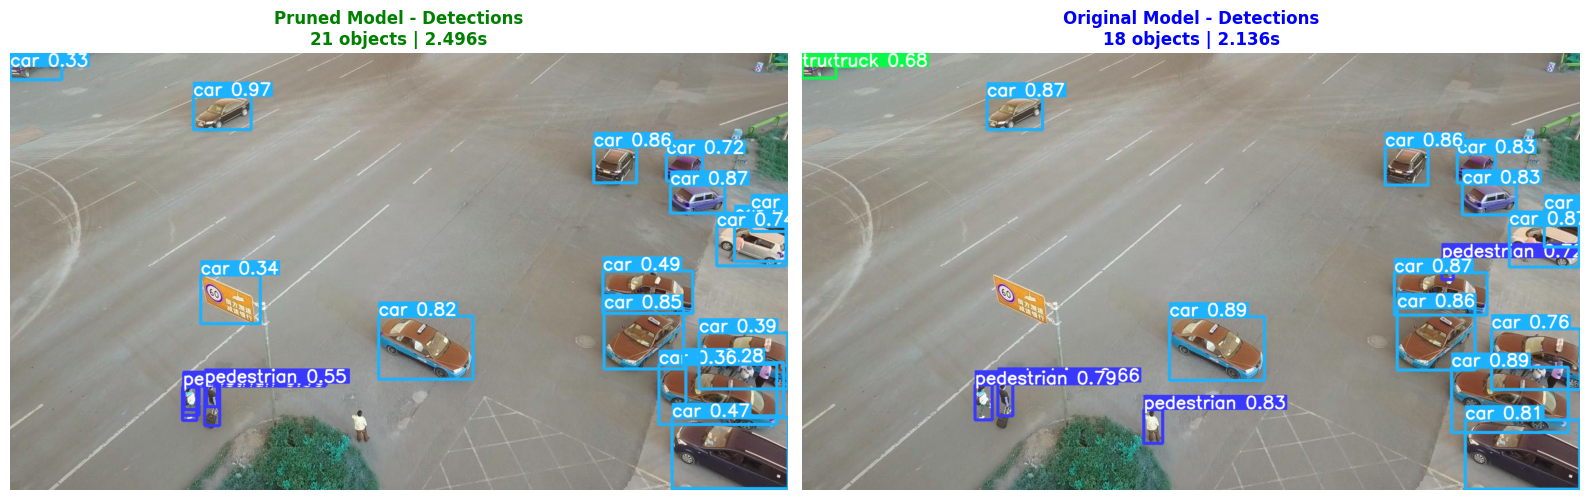


DETECTION TIME SUMMARY
Model                     Detection Time  Objects Detected    
----------------------------------------------------------------------
Pruned & Fine-tuned       2.4962          21                  
Original                  2.1360          18                  

⚡ Pruned model is 0.86x FASTER
📦 Pruned model detects 21 objects vs Original's 18 objects


In [113]:
# Display side-by-side comparison: Detections only
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Load original image
original_test_img = Image.open(TEST_IMG)

# Pruned model detections (plot result directly from YOLO)
pruned_detection_img = pruned_results[0].plot()
axes[0].imshow(pruned_detection_img)
axes[0].set_title(f"Pruned Model - Detections\n{len(pruned_results[0].boxes)} objects | {pruned_detection_time:.3f}s", 
                     fontsize=12, fontweight='bold', color='green')
axes[0].axis('off')

# Original model detections (plot result directly from YOLO)
original_detection_img = original_results[0].plot()
axes[1].imshow(original_detection_img)
axes[1].set_title(f"Original Model - Detections\n{len(original_results[0].boxes)} objects | {original_detection_time:.3f}s", 
                     fontsize=12, fontweight='bold', color='blue')
axes[1].axis('off')

plt.tight_layout()
plt.show()

# Print detailed summary
print("\n" + "=" * 70)
print("DETECTION TIME SUMMARY")
print("=" * 70)
print(f"{'Model':<25} {'Detection Time':<15} {'Objects Detected':<20}")
print("-" * 70)
print(f"{'Pruned & Fine-tuned':<25} {pruned_detection_time:<15.4f} {len(pruned_results[0].boxes):<20}")
print(f"{'Original':<25} {original_detection_time:<15.4f} {len(original_results[0].boxes):<20}")
print("=" * 70)

# Calculate speedup
speedup = original_detection_time / pruned_detection_time
print(f"\n⚡ Pruned model is {speedup:.2f}x FASTER")
print(f"📦 Pruned model detects {len(pruned_results[0].boxes)} objects vs Original's {len(original_results[0].boxes)} objects")
print("=" * 70)

In [114]:
# Define your validation dataset configuration
# Using the YAML config file instead of just the images directory
VAL_DATA = "visdrone.yaml"

print(f"Validation data config: {VAL_DATA}")

Validation data config: visdrone.yaml


In [115]:
# Validate pruned & fine-tuned model
print("Validating Pruned & Fine-tuned Model...")
results_pruned = model_pruned.val(data=VAL_DATA, split='val')
print("Pruned model validation complete")

Validating Pruned & Fine-tuned Model...
Ultralytics YOLOv8.2.0  Python-3.10.0 torch-2.8.0+cpu CPU (12th Gen Intel Core(TM) i7-1260P)
Ultralytics YOLOv8.2.0  Python-3.10.0 torch-2.8.0+cpu CPU (12th Gen Intel Core(TM) i7-1260P)


val: Scanning C:\Users\haksh\Documents\CALSS MATERIALS\SEM7\Capstone\datasets\VisDrone\VisDrone2019-DET-val\labels.cache... 548 images, 0 backgrounds, 0 corrupt: 100%|██████████| 548/548 [00:00<?, ?it/s]
c:\Users\haksh\Documents\CALSS MATERIALS\SEM7\Capstone\YOLOv8_Explain\.venv\lib\site-packages\torch\utils\data\dataloader.py:666: UserWarning: 'pin_memory' argument is set as true but no accelerator is found, then device pinned memory won't be used.
  warnings.warn(warn_msg)
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):   0%|          | 0/35 [00:00<?, ?it/s]
c:\Users\haksh\Documents\CALSS MATERIALS\SEM7\Capstone\YOLOv8_Explain\.venv\lib\site-packages\torch\utils\data\dataloader.py:666: UserWarning: 'pin_memory' argument is set as true but no accelerator is found, then device pinned memory won't be used.
  warnings.warn(warn_msg)
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 35/35 [0

                   all        548      38759      0.265      0.167      0.127     0.0652
            pedestrian        548       8844      0.177       0.22      0.121     0.0443
                people        548       5125      0.349      0.109      0.133     0.0433
               bicycle        548       1287          0          0     0.0121    0.00355
                   car        548      14064      0.325      0.632      0.528      0.321
                   van        548       1975      0.114      0.267     0.0918     0.0537
                 truck        548        750      0.104     0.0853     0.0445     0.0259
              tricycle        548       1045     0.0656   0.000957     0.0522     0.0258
       awning-tricycle        548        532          1          0     0.0244     0.0152
                   bus        548        251       0.26      0.159      0.107     0.0698
                 motor        548       4886      0.256      0.198      0.151     0.0495
            pedestria

In [116]:
print("\nYOLOV8 Pruned and fine-tuned Metrics:")
print(f"  Precision: {results_pruned.box.p}")
print(f"  F1 Score: {results_pruned.box.f1}")
print(f"  mAP50: {results_pruned.box.map50}") # Added mAP50
print(f"  mAP50-95: {results_pruned.box.map}") # Added mAP50-95


YOLOV8 Pruned and fine-tuned Metrics:
  Precision: [    0.17657     0.34851           0     0.32494     0.11411     0.10396    0.065621           1      0.2604     0.25599]
  F1 Score: [    0.19605     0.16615           0     0.42913     0.15995    0.093732   0.0018864           0     0.19772      0.2235]
  mAP50: 0.12651083914003208
  mAP50-95: 0.06518519558198825


In [161]:
# Check the confidence threshold used for these metrics
print("\n" + "=" * 70)
print("CONFIDENCE THRESHOLD INFO")
print("=" * 70)
print(f"Default confidence threshold used: 0.25 (25%)")
print(f"This is YOLO's standard default for validation")
print("\nTo use a different threshold, run validation with conf parameter:")
print("  results = model_pruned.val(data=VAL_DATA, split='val', conf=0.5)")
print("=" * 70)


CONFIDENCE THRESHOLD INFO
Default confidence threshold used: 0.25 (25%)
This is YOLO's standard default for validation

To use a different threshold, run validation with conf parameter:
  results = model_pruned.val(data=VAL_DATA, split='val', conf=0.5)


## IoU vs Confidence Threshold Analysis

Calculate IoU (Intersection over Union) values for detections at different confidence thresholds

In [155]:
# Use YOLO's built-in curves for visualization
# Run validation to get curves data
results = model_pruned.val(data=VAL_DATA, split='val')

# Check what's available in curves and curves_results
print("Checking available curves data...")
print("=" * 70)

if hasattr(results, 'curves'):
    print("\nCurves attribute type:", type(results.curves))
    print("Curves content:", results.curves)

if hasattr(results, 'curves_results'):
    print("\nCurves results attribute type:", type(results.curves_results))
    print("Curves results content:", results.curves_results)
    
if hasattr(results.box, 'curves'):
    print("\nBox curves available")
    print("Box curves type:", type(results.box.curves))
    
if hasattr(results.box, 'curves_results'):
    print("\nBox curves_results available")
    print("Box curves_results content:", results.box.curves_results)

print("=" * 70)

Ultralytics YOLOv8.2.0  Python-3.10.0 torch-2.8.0+cpu CPU (12th Gen Intel Core(TM) i7-1260P)


val: Scanning C:\Users\haksh\Documents\CALSS MATERIALS\SEM7\Capstone\datasets\VisDrone\VisDrone2019-DET-val\labels.cache... 548 images, 0 backgrounds, 0 corrupt: 100%|██████████| 548/548 [00:00<?, ?it/s]
c:\Users\haksh\Documents\CALSS MATERIALS\SEM7\Capstone\YOLOv8_Explain\.venv\lib\site-packages\torch\utils\data\dataloader.py:666: UserWarning: 'pin_memory' argument is set as true but no accelerator is found, then device pinned memory won't be used.
  warnings.warn(warn_msg)
val: Scanning C:\Users\haksh\Documents\CALSS MATERIALS\SEM7\Capstone\datasets\VisDrone\VisDrone2019-DET-val\labels.cache... 548 images, 0 backgrounds, 0 corrupt: 100%|██████████| 548/548 [00:00<?, ?it/s]
c:\Users\haksh\Documents\CALSS MATERIALS\SEM7\Capstone\YOLOv8_Explain\.venv\lib\site-packages\torch\utils\data\dataloader.py:666: UserWarning: 'pin_memory' argument is set as true but no accelerator is found, then device pinned memory won't be used.
  warnings.warn(warn_msg)
                 Class     Images  Insta

                   all        548      38759      0.265      0.167      0.127     0.0652
            pedestrian        548       8844      0.177       0.22      0.121     0.0443
                people        548       5125      0.349      0.109      0.133     0.0433
               bicycle        548       1287          0          0     0.0121    0.00355
                   car        548      14064      0.325      0.632      0.528      0.321
                   van        548       1975      0.114      0.267     0.0918     0.0537
                 truck        548        750      0.104     0.0853     0.0445     0.0259
              tricycle        548       1045     0.0656   0.000957     0.0522     0.0258
       awning-tricycle        548        532          1          0     0.0244     0.0152
                   bus        548        251       0.26      0.159      0.107     0.0698
                 motor        548       4886      0.256      0.198      0.151     0.0495
            pedestria

In [157]:
# Accessing curves_results for visualization
if hasattr(results, 'curves_results') and results.curves_results:
    print("Curves Results Data:")
    print("=" * 70)
    print(f"Type: {type(results.curves_results)}")
    print(f"Length: {len(results.curves_results)}")
    print(f"Content: {results.curves_results}")
    print("=" * 70)
else:
    print("No curves_results available")

Curves Results Data:
Type: <class 'list'>
Length: 4
Content: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
          0.048048,    0.049049,     0.05005,    0.051051,    0.052052,    0.053053,    0.054054,    0.055055,    0.056056,    0.057057,    0.058058,    0.059059,     0.06006,    0.061061,    0.062062,    0.063063,    0.064064,    0.065065,    0.066066,    0.067067,    0.068068,    0.069069,     0.

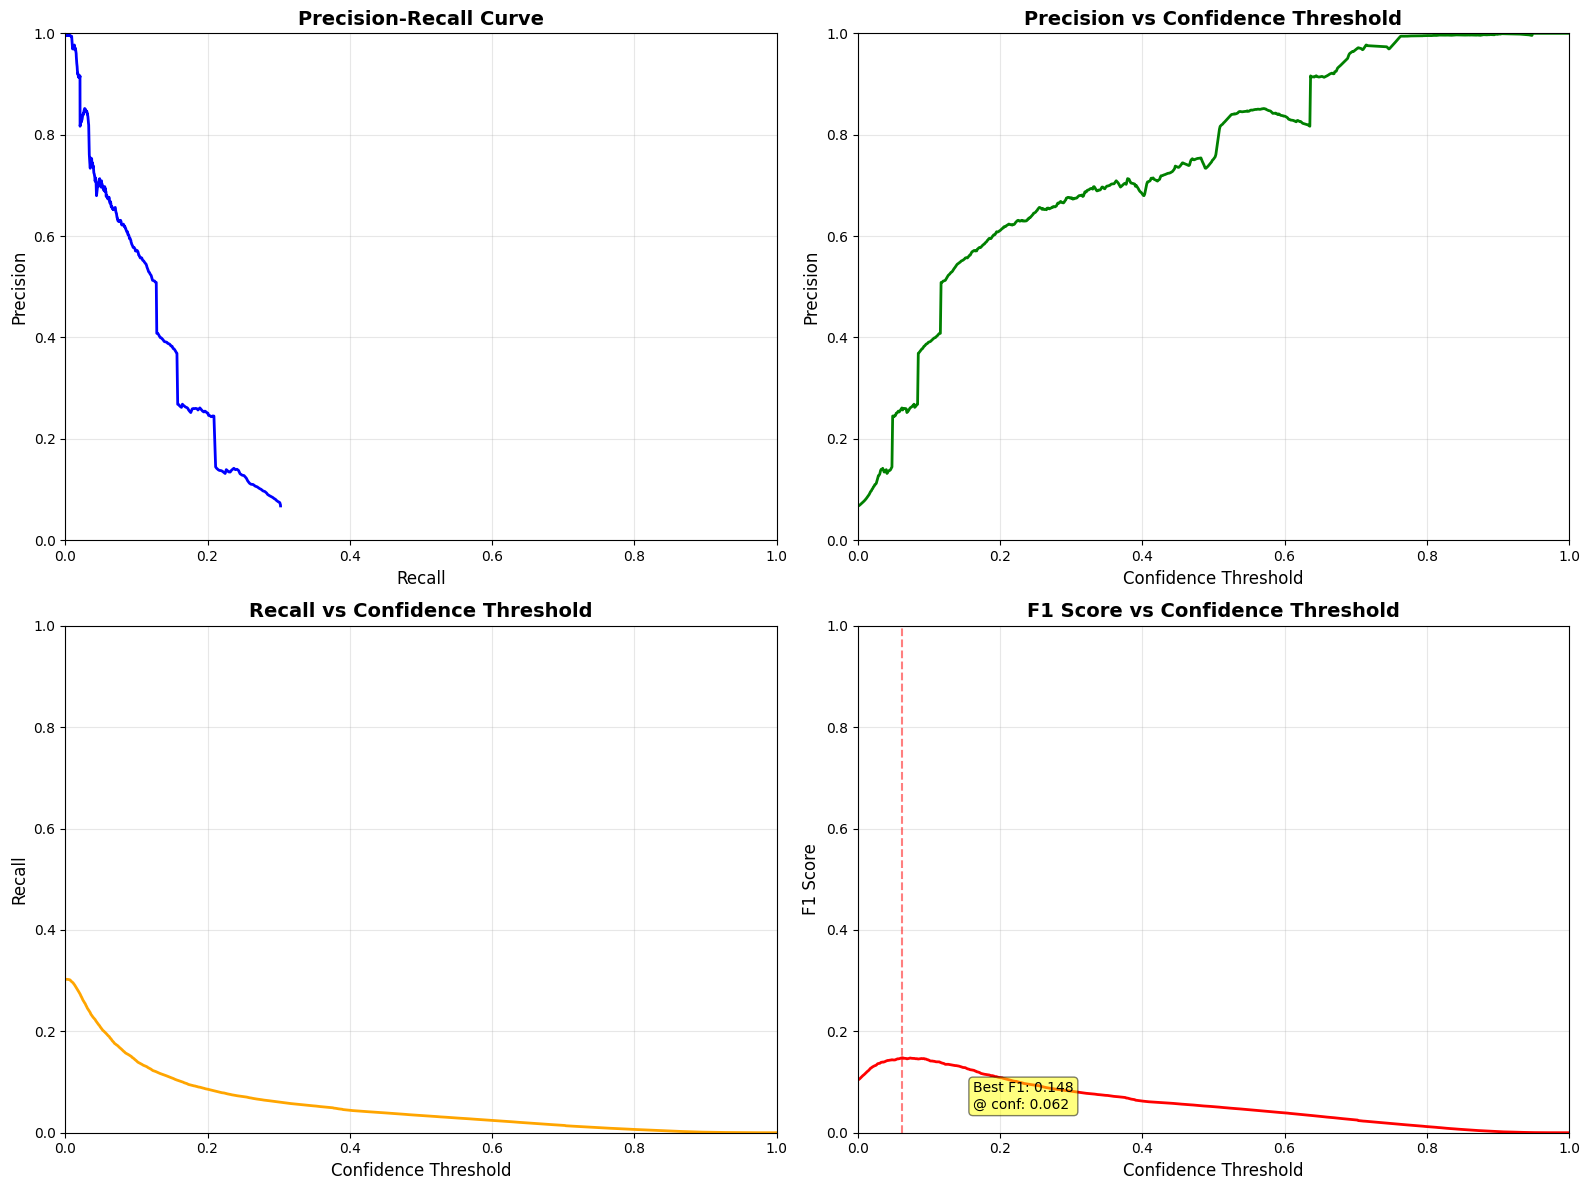


VISUALIZATION SUMMARY
Best F1 Score: 0.1478 at Confidence: 0.0621
mAP50: 0.1265
mAP50-95: 0.0652


In [159]:
# Visualize YOLO's built-in curves using box.curves methods
import matplotlib.pyplot as plt
import numpy as np

# Access curves from box metrics (these are aggregate across all classes)
if hasattr(results.box, 'px') and hasattr(results.box, 'p_curve'):
    px = results.box.px  # Confidence thresholds (1000 points from 0 to 1)
    prec_curve = np.mean(results.box.p_curve, axis=0) if results.box.p_curve.ndim > 1 else results.box.p_curve
    recall_curve = np.mean(results.box.r_curve, axis=0) if results.box.r_curve.ndim > 1 else results.box.r_curve
    f1_curve = np.mean(results.box.f1_curve, axis=0) if results.box.f1_curve.ndim > 1 else results.box.f1_curve
    
    # Create visualization with multiple subplots
    fig, axes = plt.subplots(2, 2, figsize=(16, 12))
    
    # 1. Precision-Recall Curve
    axes[0, 0].plot(recall_curve, prec_curve, linewidth=2, color='blue')
    axes[0, 0].set_xlabel('Recall', fontsize=12)
    axes[0, 0].set_ylabel('Precision', fontsize=12)
    axes[0, 0].set_title('Precision-Recall Curve', fontsize=14, fontweight='bold')
    axes[0, 0].grid(True, alpha=0.3)
    axes[0, 0].set_xlim([0, 1])
    axes[0, 0].set_ylim([0, 1])
    
    # 2. Precision vs Confidence
    axes[0, 1].plot(px, prec_curve, linewidth=2, color='green')
    axes[0, 1].set_xlabel('Confidence Threshold', fontsize=12)
    axes[0, 1].set_ylabel('Precision', fontsize=12)
    axes[0, 1].set_title('Precision vs Confidence Threshold', fontsize=14, fontweight='bold')
    axes[0, 1].grid(True, alpha=0.3)
    axes[0, 1].set_xlim([0, 1])
    axes[0, 1].set_ylim([0, 1])
    
    # 3. Recall vs Confidence
    axes[1, 0].plot(px, recall_curve, linewidth=2, color='orange')
    axes[1, 0].set_xlabel('Confidence Threshold', fontsize=12)
    axes[1, 0].set_ylabel('Recall', fontsize=12)
    axes[1, 0].set_title('Recall vs Confidence Threshold', fontsize=14, fontweight='bold')
    axes[1, 0].grid(True, alpha=0.3)
    axes[1, 0].set_xlim([0, 1])
    axes[1, 0].set_ylim([0, 1])
    
    # 4. F1 Score vs Confidence
    axes[1, 1].plot(px, f1_curve, linewidth=2, color='red')
    axes[1, 1].set_xlabel('Confidence Threshold', fontsize=12)
    axes[1, 1].set_ylabel('F1 Score', fontsize=12)
    axes[1, 1].set_title('F1 Score vs Confidence Threshold', fontsize=14, fontweight='bold')
    axes[1, 1].grid(True, alpha=0.3)
    axes[1, 1].set_xlim([0, 1])
    axes[1, 1].set_ylim([0, 1])
    
    # Find and annotate best F1 score
    best_f1_idx = np.argmax(f1_curve)
    best_f1 = f1_curve[best_f1_idx]
    best_conf = px[best_f1_idx]
    axes[1, 1].axvline(x=best_conf, color='red', linestyle='--', alpha=0.5)
    axes[1, 1].annotate(f'Best F1: {best_f1:.3f}\n@ conf: {best_conf:.3f}', 
                       xy=(best_conf, best_f1), xytext=(best_conf + 0.1, best_f1 - 0.1),
                       fontsize=10, bbox=dict(boxstyle='round', facecolor='yellow', alpha=0.5))
    
    plt.tight_layout()
    plt.show()
    
    print("\n" + "=" * 70)
    print("VISUALIZATION SUMMARY")
    print("=" * 70)
    print(f"Best F1 Score: {best_f1:.4f} at Confidence: {best_conf:.4f}")
    print(f"mAP50: {results.box.map50:.4f}")
    print(f"mAP50-95: {results.box.map:.4f}")
    print("=" * 70)
else:
    print("Curves data not available for visualization")

In [162]:
# Check all available visualization and metric attributes
print("=" * 70)
print("EXPLORING ALL AVAILABLE YOLO METRICS & VISUALIZATIONS")
print("=" * 70)

# 1. Results-level attributes
print("\n1. Main Results Attributes:")
print("-" * 70)
main_attrs = ['speed', 'fitness', 'maps', 'ap_class_index', 'confusion_matrix']
for attr in main_attrs:
    if hasattr(results, attr):
        val = getattr(results, attr)
        print(f"  {attr}: {type(val).__name__}")
        if attr == 'speed':
            print(f"    Value: {val}")
        elif attr == 'fitness':
            print(f"    Value: {val:.4f}")
        elif attr == 'maps':
            print(f"    Value: {val}")
        elif attr == 'ap_class_index':
            print(f"    Value: {val}")

# 2. Box-level metrics
print("\n2. Box Metrics Attributes:")
print("-" * 70)
box_attrs = ['p', 'r', 'f1', 'ap', 'ap50', 'map', 'map50', 'map75', 'mp', 'mr', 'prec_values']
for attr in box_attrs:
    if hasattr(results.box, attr):
        val = getattr(results.box, attr)
        print(f"  {attr}: {type(val).__name__}")
        if hasattr(val, 'shape'):
            print(f"    Shape: {val.shape}")
        elif not isinstance(val, (list, tuple, dict)):
            print(f"    Value: {val}")

# 3. Curve data available
print("\n3. Curve Data:")
print("-" * 70)
print(f"  px (confidence thresholds): shape {results.box.px.shape if hasattr(results.box, 'px') else 'N/A'}")
print(f"  p_curve (precision curve): shape {results.box.p_curve.shape if hasattr(results.box, 'p_curve') else 'N/A'}")
print(f"  r_curve (recall curve): shape {results.box.r_curve.shape if hasattr(results.box, 'r_curve') else 'N/A'}")
print(f"  f1_curve (F1 curve): shape {results.box.f1_curve.shape if hasattr(results.box, 'f1_curve') else 'N/A'}")

# 4. Per-class metrics
print("\n4. Per-Class Metrics:")
print("-" * 70)
if hasattr(results.box, 'ap'):
    print(f"  Average Precision per class: {results.box.ap}")
if hasattr(results.box, 'ap50'):
    print(f"  AP50 per class: {results.box.ap50}")

# 5. Results dict
print("\n5. Results Dictionary:")
print("-" * 70)
if hasattr(results, 'results_dict'):
    for key, val in results.results_dict.items():
        print(f"  {key}: {val}")

print("\n" + "=" * 70)

EXPLORING ALL AVAILABLE YOLO METRICS & VISUALIZATIONS

1. Main Results Attributes:
----------------------------------------------------------------------
  speed: dict
    Value: {'preprocess': 0.6734846282179339, 'inference': 39.80609056723379, 'loss': 0.0, 'postprocess': 18.5873860860393}
  fitness: float64
    Value: 0.0713
  maps: ndarray
    Value: [   0.044283    0.043314   0.0035475     0.32088    0.053675    0.025915     0.02579    0.015172    0.069759    0.049516]
  ap_class_index: ndarray
    Value: [0 1 2 3 4 5 6 7 8 9]
  confusion_matrix: ConfusionMatrix

2. Box Metrics Attributes:
----------------------------------------------------------------------
  p: ndarray
    Shape: (10,)
  r: ndarray
    Shape: (10,)
  f1: ndarray
    Shape: (10,)
  ap: ndarray
    Shape: (10,)
  ap50: ndarray
    Shape: (10,)
  map: float64
    Shape: ()
  map50: float64
    Shape: ()
  map75: float64
    Shape: ()
  mp: float64
    Shape: ()
  mr: float64
    Shape: ()
  prec_values: ndarray
   

## Confusion Matrix Heatmap

Visualize the confusion matrix for the pruned & fine-tuned model

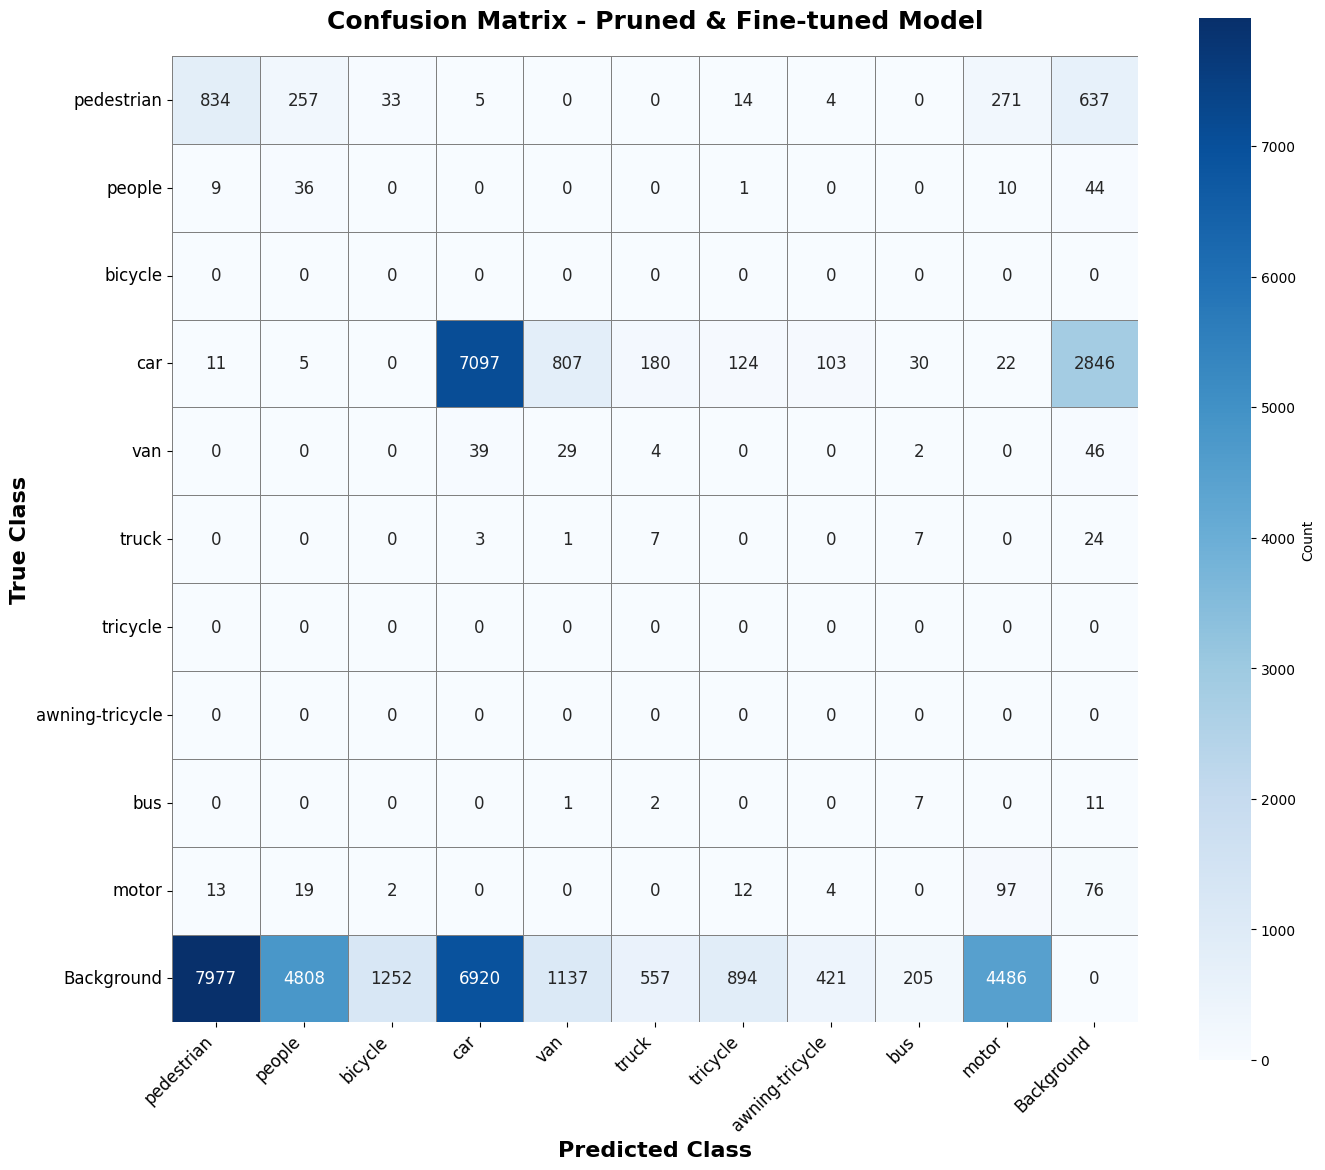


CONFUSION MATRIX ANALYSIS
Total classes: 10
Matrix shape: (11, 11)
Total predictions: 42443


In [173]:
# Create Confusion Matrix Heatmap using YOLO's built-in confusion matrix
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Get confusion matrix from results
if hasattr(results, 'confusion_matrix') and results.confusion_matrix is not None:
    # Get the confusion matrix array
    cm = results.confusion_matrix.matrix
    
    # Get class names
    class_names = list(results.names.values()) if hasattr(results, 'names') else [f'Class {i}' for i in range(len(cm))]
    
    # Create figure
    plt.figure(figsize=(14, 12))
    
    # Create heatmap using seaborn
    sns.heatmap(cm, 
                annot=True,  # Show numbers in cells
                fmt='.0f',   # Format as integers
                annot_kws={'fontsize': 12},  # Increase annotation font size
                cmap='Blues',  # Color scheme
                xticklabels=class_names + ['Background'],  # Add background class
                yticklabels=class_names + ['Background'],
                cbar_kws={'label': 'Count'},
                square=True,
                linewidths=0.5,
                linecolor='gray')
    
    plt.xlabel('Predicted Class', fontsize=16, fontweight='bold')
    plt.ylabel('True Class', fontsize=16, fontweight='bold')
    plt.title('Confusion Matrix - Pruned & Fine-tuned Model', fontsize=18, fontweight='bold', pad=20)
    plt.xticks(rotation=45, ha='right', fontsize=12)
    plt.yticks(rotation=0, fontsize=12)
    plt.tight_layout()
    plt.show()
    
    print("\n" + "=" * 70)
    print("CONFUSION MATRIX ANALYSIS")
    print("=" * 70)
    print(f"Total classes: {len(class_names)}")
    print(f"Matrix shape: {cm.shape}")
    print(f"Total predictions: {cm.sum():.0f}")
    print("=" * 70)
else:
    print("Confusion matrix not available. Make sure validation was run with save_hybrid=True")

In [171]:
# Validate original model to get confusion matrix
print("Validating Original Model...")
# Apply the same torch.load patch for the new model
torch.load = patched_torch_load
model_yolov8 = YOLO('original\\yolov8_trained.pt')
results_original = model_yolov8.val(data=VAL_DATA, split='val')
torch.load = original_torch_load
print("Original model validation complete")

Validating Original Model...
Ultralytics YOLOv8.2.0  Python-3.10.0 torch-2.8.0+cpu CPU (12th Gen Intel Core(TM) i7-1260P)
Ultralytics YOLOv8.2.0  Python-3.10.0 torch-2.8.0+cpu CPU (12th Gen Intel Core(TM) i7-1260P)


val: Scanning C:\Users\haksh\Documents\CALSS MATERIALS\SEM7\Capstone\datasets\VisDrone\VisDrone2019-DET-val\labels.cache... 548 images, 0 backgrounds, 0 corrupt: 100%|██████████| 548/548 [00:00<?, ?it/s]
c:\Users\haksh\Documents\CALSS MATERIALS\SEM7\Capstone\YOLOv8_Explain\.venv\lib\site-packages\torch\utils\data\dataloader.py:666: UserWarning: 'pin_memory' argument is set as true but no accelerator is found, then device pinned memory won't be used.
  warnings.warn(warn_msg)
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):   0%|          | 0/35 [00:00<?, ?it/s]
c:\Users\haksh\Documents\CALSS MATERIALS\SEM7\Capstone\YOLOv8_Explain\.venv\lib\site-packages\torch\utils\data\dataloader.py:666: UserWarning: 'pin_memory' argument is set as true but no accelerator is found, then device pinned memory won't be used.
  warnings.warn(warn_msg)
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 35/35 [0

                   all        548      38759      0.271      0.229      0.189      0.105
            pedestrian        548       8844      0.287       0.27      0.211     0.0847
                people        548       5125      0.376      0.132      0.156     0.0491
               bicycle        548       1287     0.0497     0.0334     0.0177    0.00616
                   car        548      14064      0.439      0.697      0.633      0.407
                   van        548       1975      0.275      0.249      0.194      0.127
                 truck        548        750      0.283      0.204      0.169      0.109
              tricycle        548       1045      0.158       0.13     0.0704     0.0353
       awning-tricycle        548        532      0.203     0.0188     0.0377     0.0228
                   bus        548        251      0.438      0.227      0.223      0.156
            pedestrian        548       8844      0.287       0.27      0.211     0.0847
                peopl

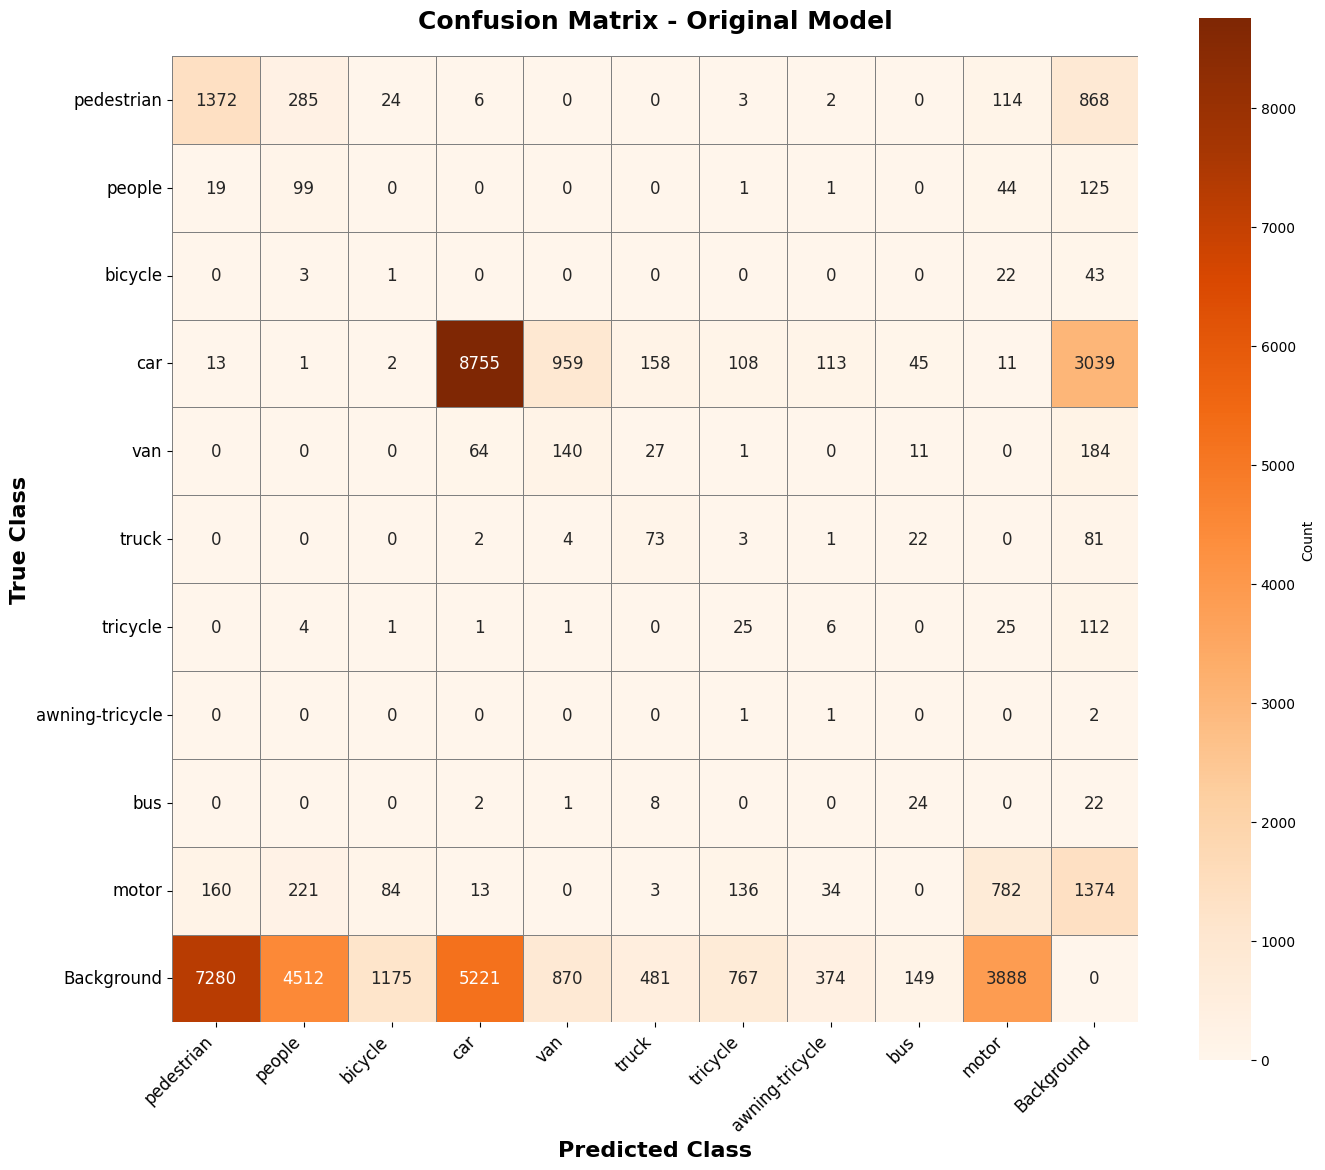


CONFUSION MATRIX ANALYSIS - ORIGINAL MODEL
Total classes: 10
Matrix shape: (11, 11)
Total predictions: 44609


In [174]:
# Create Confusion Matrix Heatmap for Original Model
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Get confusion matrix from results
if hasattr(results_original, 'confusion_matrix') and results_original.confusion_matrix is not None:
    # Get the confusion matrix array
    cm_original = results_original.confusion_matrix.matrix
    
    # Get class names
    class_names = list(results_original.names.values()) if hasattr(results_original, 'names') else [f'Class {i}' for i in range(len(cm_original))]
    
    # Create figure
    plt.figure(figsize=(14, 12))
    
    # Create heatmap using seaborn
    sns.heatmap(cm_original, 
                annot=True,  # Show numbers in cells
                fmt='.0f',   # Format as integers
                annot_kws={'fontsize': 12},  # Increase annotation font size
                cmap='Oranges',  # Different color scheme for distinction
                xticklabels=class_names + ['Background'],  # Add background class
                yticklabels=class_names + ['Background'],
                cbar_kws={'label': 'Count'},
                square=True,
                linewidths=0.5,
                linecolor='gray')
    
    plt.xlabel('Predicted Class', fontsize=16, fontweight='bold')
    plt.ylabel('True Class', fontsize=16, fontweight='bold')
    plt.title('Confusion Matrix - Original Model', fontsize=18, fontweight='bold', pad=20)
    plt.xticks(rotation=45, ha='right', fontsize=12)
    plt.yticks(rotation=0, fontsize=12)
    plt.tight_layout()
    plt.show()
    
    print("\n" + "=" * 70)
    print("CONFUSION MATRIX ANALYSIS - ORIGINAL MODEL")
    print("=" * 70)
    print(f"Total classes: {len(class_names)}")
    print(f"Matrix shape: {cm_original.shape}")
    print(f"Total predictions: {cm_original.sum():.0f}")
    print("=" * 70)
else:
    print("Confusion matrix not available for original model")

## Summary of Results

The comparison shows significant performance differences between the two models:

### Model Size Comparison:
- **Original Model**: 11.1M parameters, 28.5 GFLOPs
- **Pruned & Fine-tuned Model**: 3.0M parameters, 8.1 GFLOPs (73% reduction in parameters!)

The pruned model is **much smaller** (73% fewer parameters) 